In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib, collections, datetime, hashlib, os, re, time, sys
import pygal.maps.world

# 对国家进行分析 

# DOT 

In [13]:
dot_ip = pd.read_json("../../../map/dot-location-ip.txt",lines=True)
dot_ip

status        country countryCode region  \
0      success      Hong Kong          HK    HCW   
1      success         Taiwan          TW    KHH   
2      success         Canada          CA     QC   
3      success         Canada          CA     QC   
4      success         Canada          CA     QC   
...        ...            ...         ...    ...   
18179  success         Canada          CA     ON   
18180  success         Russia          RU    MOW   
18181  success          Japan          JP     13   
18182  success  United States          US     IA   
18183  success        Germany          DE     BY   

                         regionName            city       zip      lat  \
0      Central and Western District         Central     96521  22.2908   
1                         Kaohsiung  Kaohsiung City            22.6148   
2                            Quebec        Montreal       H4X  45.5017   
3                            Quebec        Montreal       H4X  45.5017   
4                            Quebec        Montreal       H4X  45.5017   
...                             ...             ...       ...      ...   
18179                       Ontario         Toronto       M5K  43.6447   
18180                        Moscow          Moscow    101194  55.7129   
18181                         Tokyo           Tokyo  151-0053  35.6893   
18182                          Iowa       Radcliffe     50230  42.3249   
18183                       Bavaria          Passau     94032  48.5759   

            lon         timezone                              isp  \
0      114.1501   Asia/Hong_Kong  Hong Kong Broadband Network Ltd   
1      120.3139      Asia/Taipei       Chunghwa Telecom Co., Ltd.   
2      -73.5673  America/Toronto                 Cloudflare, Inc.   
3      -73.5673  America/Toronto                 Cloudflare, Inc.   
4      -73.5673  America/Toronto                 Cloudflare, Inc.   
...         ...              ...                              ...   
18179  -79.3840  America/Toronto                  NetActuate, Inc   
18180   37.6212    Europe/Moscow                       Ionica LLC   
18181  139.6899       Asia/Tokyo                      Linode, LLC   
18182  -93.4192  America/Chicago          Aureon Network Services   
18183   13.4497    Europe/Berlin             Telepark Passau GmbH   

                                   org  \
0      Hong Kong Broadband Network Ltd   
1            Chunghwa Telecom Co. Ltd.   
2                     Cloudflare, Inc.   
3                     Cloudflare, Inc.   
4                     Cloudflare, Inc.   
...                                ...   
18179                Host Virtual, Inc   
18180                                    
18181                           Linode   
18182              Radcliffe Telephone   
18183             Telepark Passau GmbH   

                                             as            query  
0             AS10103 HK Broadband Network Ltd.   165.84.169.145  
1      AS3462 Data Communication Business Group    61.216.59.194  
2                      AS13335 Cloudflare, Inc.     162.159.46.1  
3                      AS13335 Cloudflare, Inc.    172.64.36.164  
4                      AS13335 Cloudflare, Inc.    162.159.36.96  
...                                         ...              ...  
18179                   AS36236 NetActuate, Inc  162.248.220.187  
18180                   AS199274 Serveroid, LLC    91.239.27.199  
18181                       AS63949 Linode, LLC    172.104.118.6  
18182            AS5056 Aureon Network Services   207.177.125.53  
18183              AS41307 Telepark Passau GmbH     185.39.65.47  

[18184 rows x 14 columns]

In [14]:
dot_ip["countryCode"] = dot_ip.countryCode.apply(lambda x: x.lower())

In [15]:
dot_country_list = dot_ip["countryCode"].value_counts()
dot_country_list

us    4063
il    2344
de    1580
ca    1301
kr     824
      ... 
gf       1
gn       1
uz       1
am       1
hr       1
Name: countryCode, Length: 132, dtype: int64

In [22]:
dot_country_dict_4000 = dot_country_list[dot_country_list>4000].to_dict()
dot_country_dict_1000 = dot_country_list[(dot_country_list>1000)&(dot_country_list<=4000)].to_dict()
dot_country_dict_500 = dot_country_list[(dot_country_list>500)&(dot_country_list<=1000)].to_dict()
dot_country_dict_100 = dot_country_list[(dot_country_list>100)&(dot_country_list<=500)].to_dict()
dot_country_dict_10 = dot_country_list[(dot_country_list>10)&(dot_country_list<=100)].to_dict()
dot_country_dict_1 = dot_country_list[(dot_country_list>0)&(dot_country_list<=10)].to_dict()

## 画图 

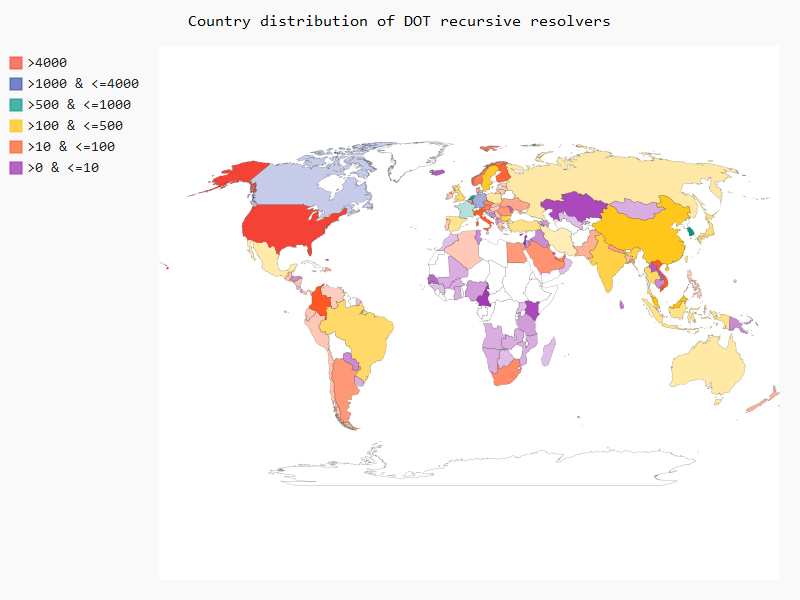

In [27]:
# from pygal.style import Style
# custom_style = Style(colors=('#FF0000', '#FFA500', '#0000FF','#008000'))

              
# worldmap_chart = pygal.maps.world.World(style=custom_style)
worldmap_chart = pygal.maps.world.World()

worldmap_chart.title = 'Country distribution of DOT recursive resolvers'

worldmap_chart.add('>4000', dot_country_dict_4000)
worldmap_chart.add('>1000 & <=4000', dot_country_dict_1000)
worldmap_chart.add('>500 & <=1000', dot_country_dict_500)
worldmap_chart.add('>100 & <=500', dot_country_dict_100)
worldmap_chart.add('>10 & <=100', dot_country_dict_10)
worldmap_chart.add('>0 & <=10', dot_country_dict_1)

# worldmap_chart.render_to_png('dot-country.png')
worldmap_chart.render_to_file('dot-country.svg')
worldmap_chart

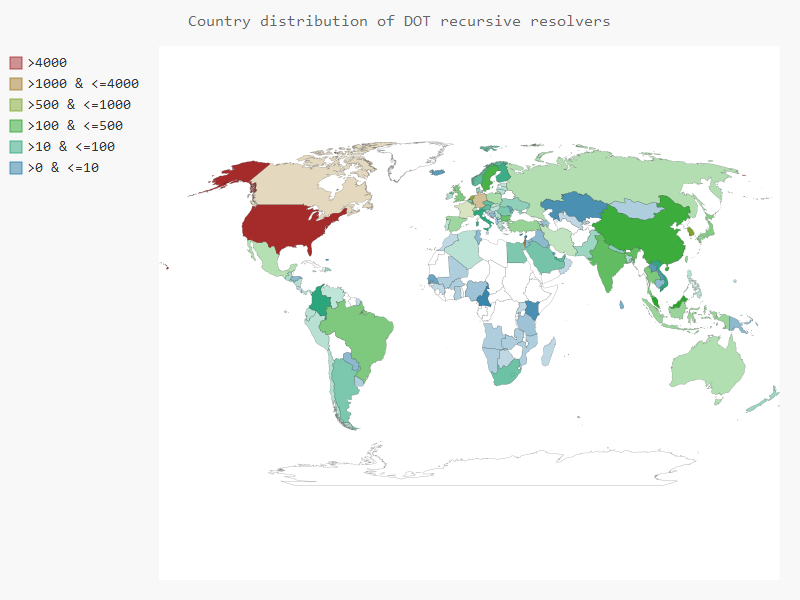

In [28]:
from pygal_maps_world.i18n import COUNTRIES
from pygal_maps_world.maps import World
from pygal.style import RotateStyle
from pygal.style import LightColorizedStyle
# custom_style = Style(colors=('#FF0000', '#FFA500', '#0000FF','#008000'))

wm_style = RotateStyle('#A52A2A', base_style=LightColorizedStyle)
world = World(style=wm_style)
            
world.title = 'Country distribution of DOT recursive resolvers'

world.add('>4000', dot_country_dict_4000)
world.add('>1000 & <=4000', dot_country_dict_1000)
world.add('>500 & <=1000', dot_country_dict_500)
world.add('>100 & <=500', dot_country_dict_100)
world.add('>10 & <=100', dot_country_dict_10)
world.add('>0 & <=10', dot_country_dict_1)
# world.render_to_png('dot-country-1.png')
world.render_to_file('dot-country-1.svg')
world

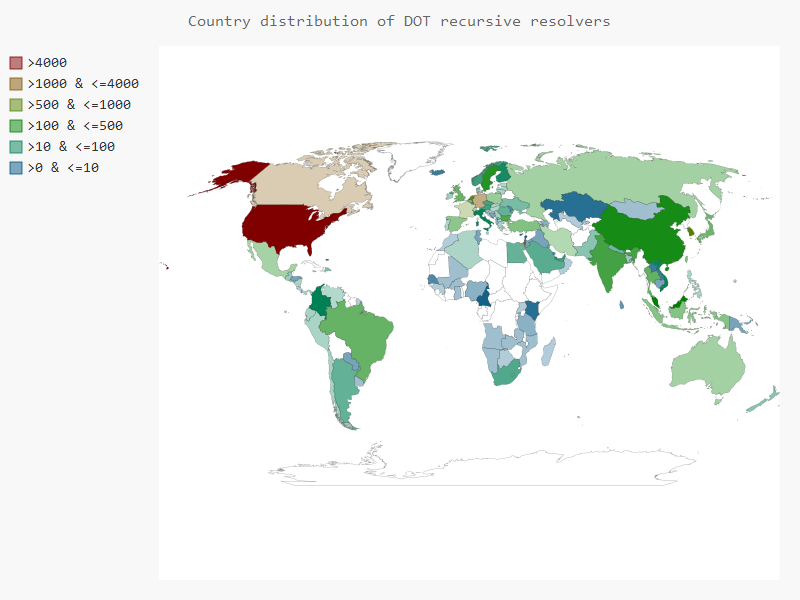

In [29]:
from pygal_maps_world.i18n import COUNTRIES
from pygal_maps_world.maps import World
from pygal.style import RotateStyle
from pygal.style import LightColorizedStyle
# custom_style = Style(colors=('#FF0000', '#FFA500', '#0000FF','#008000'))

wm_style = RotateStyle('#800000', base_style=LightColorizedStyle)
world = World(style=wm_style)
            
world.title = 'Country distribution of DOT recursive resolvers'

world.add('>4000', dot_country_dict_4000)
world.add('>1000 & <=4000', dot_country_dict_1000)
world.add('>500 & <=1000', dot_country_dict_500)
world.add('>100 & <=500', dot_country_dict_100)
world.add('>10 & <=100', dot_country_dict_10)
world.add('>0 & <=10', dot_country_dict_1)


world.render_to_file('dot-country-2.svg')
world

# DOH 

In [5]:
doh_ip = pd.read_json("../../../map/doh/doh-location-ip.txt",lines=True)
doh_ip = pd.DataFrame(doh_ip,columns = ['query','country','countryCode','isp','org','lat','lon'])
doh_ip = doh_ip.rename(columns={"query":"ip"})
doh_ip

ip        country countryCode  \
0             1.0.0.1      Australia          AU   
1             1.0.0.2      Australia          AU   
2             1.0.0.3      Australia          AU   
3      101.100.188.23      Singapore          SG   
4     101.101.101.101         Taiwan          TW   
...               ...            ...         ...   
9329   163.44.153.212          Japan          JP   
9330  164.160.130.158        Nigeria          NG   
9331    164.90.155.71  United States          US   
9332    164.90.161.84        Germany          DE   
9333   164.90.245.136  United States          US   

                                    isp  \
0                       Cloudflare, Inc   
1                       Cloudflare, Inc   
2                       Cloudflare, Inc   
3                    Myrepublic Limited   
4     Taiwan Network Information Center   
...                                 ...   
9329                GMO-Z.COM PTE. LTD.   
9330                          GARANNTOR   
9331                  DigitalOcean, LLC   
9332                  DigitalOcean, LLC   
9333                  DigitalOcean, LLC   

                                            org       lat        lon  
0     APNIC and Cloudflare DNS Resolver project -27.47660  153.01660  
1     APNIC and Cloudflare DNS Resolver project -27.47660  153.01660  
2     APNIC and Cloudflare DNS Resolver project -27.47660  153.01660  
3                               Republictelecom   1.31857  103.95000  
4                            Twnic Experimental  25.03300  121.56500  
...                                         ...       ...        ...  
9329                         GMO Internet, Inc.  35.65650  139.70000  
9330                                              6.58849    3.36369  
9331                          DigitalOcean, LLC  37.39310 -121.96200  
9332                          DigitalOcean, LLC  50.11880    8.68430  
9333                          DigitalOcean, LLC  37.39310 -121.96200  

[9334 rows x 7 columns]

In [6]:
doh_raw = pd.read_csv("../../../递归解析器/DOH/raw_data/result_doh.txt")
doh_raw = pd.DataFrame(doh_raw,columns = ['ip'])

doh_ip = pd.merge(doh_raw,doh_ip,on=['ip'])
doh_ip

ip        country countryCode                 isp  \
0             1.0.0.2      Australia          AU     Cloudflare, Inc   
1        130.61.56.82        Germany          DE  Oracle Corporation   
2       135.84.249.13          India          IN       iZus Co., Ltd   
3       135.84.249.13          India          IN       iZus Co., Ltd   
4       135.84.249.13          India          IN       iZus Co., Ltd   
...               ...            ...         ...                 ...   
23190    52.42.134.63  United States          US    Amazon.com, Inc.   
23191  63.240.152.245  United States          US             CERFnet   
23192  63.240.152.245  United States          US             CERFnet   
23193  63.240.152.245  United States          US             CERFnet   
23194  63.240.152.245  United States          US             CERFnet   

                                                org      lat       lon  
0         APNIC and Cloudflare DNS Resolver project -27.4766  153.0166  
1      Oracle Cloud Infrastructure (eu-frankfurt-1)  50.1049    8.6295  
2                                   Scape Reach LTD  12.8696   74.8453  
3                                   Scape Reach LTD  12.8696   74.8453  
4                                   Scape Reach LTD  12.8696   74.8453  
...                                             ...      ...       ...  
23190                           AWS EC2 (us-west-2)  45.5235 -122.6760  
23191                          Snap-on Incorporated  42.5842  -87.8216  
23192                          Snap-on Incorporated  42.5842  -87.8216  
23193                          Snap-on Incorporated  42.5842  -87.8216  
23194                          Snap-on Incorporated  42.5842  -87.8216  

[23195 rows x 7 columns]

In [7]:
doh_ip["countryCode"] = doh_ip.countryCode.apply(lambda x: x.lower())

In [8]:
doh_country_list = doh_ip["countryCode"].value_counts()
doh_country_list

us    7829
in    2767
ca    2408
kr    2019
de    1505
      ... 
gd       1
py       1
cd       1
cr       1
gh       1
Name: countryCode, Length: 109, dtype: int64

In [31]:
doh_country_dict_4000 = doh_country_list[doh_country_list>4000].to_dict()
doh_country_dict_1000 = doh_country_list[(doh_country_list>1000)&(doh_country_list<=4000)].to_dict()
doh_country_dict_500 = doh_country_list[(doh_country_list>500)&(doh_country_list<=1000)].to_dict()
doh_country_dict_100 = doh_country_list[(doh_country_list>100)&(doh_country_list<=500)].to_dict()
doh_country_dict_10 = doh_country_list[(doh_country_list>10)&(doh_country_list<=100)].to_dict()
doh_country_dict_1 = doh_country_list[(doh_country_list>0)&(doh_country_list<=10)].to_dict()

## 画图 

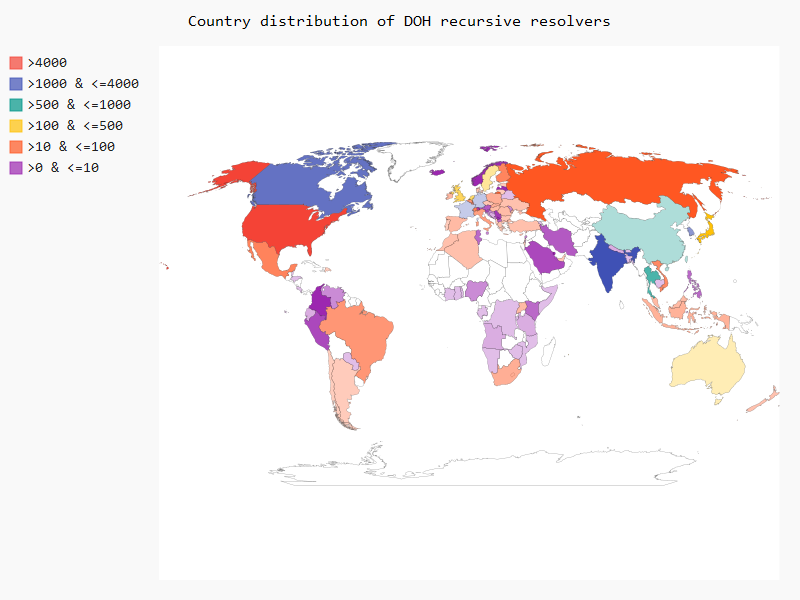

In [32]:
worldmap_chart = pygal.maps.world.World()

worldmap_chart.title = 'Country distribution of DOH recursive resolvers'

worldmap_chart.add('>4000', doh_country_dict_4000)
worldmap_chart.add('>1000 & <=4000', doh_country_dict_1000)
worldmap_chart.add('>500 & <=1000', doh_country_dict_500)
worldmap_chart.add('>100 & <=500', doh_country_dict_100)
worldmap_chart.add('>10 & <=100', doh_country_dict_10)
worldmap_chart.add('>0 & <=10', doh_country_dict_1)


worldmap_chart.render_to_file('doh-country.svg')
worldmap_chart

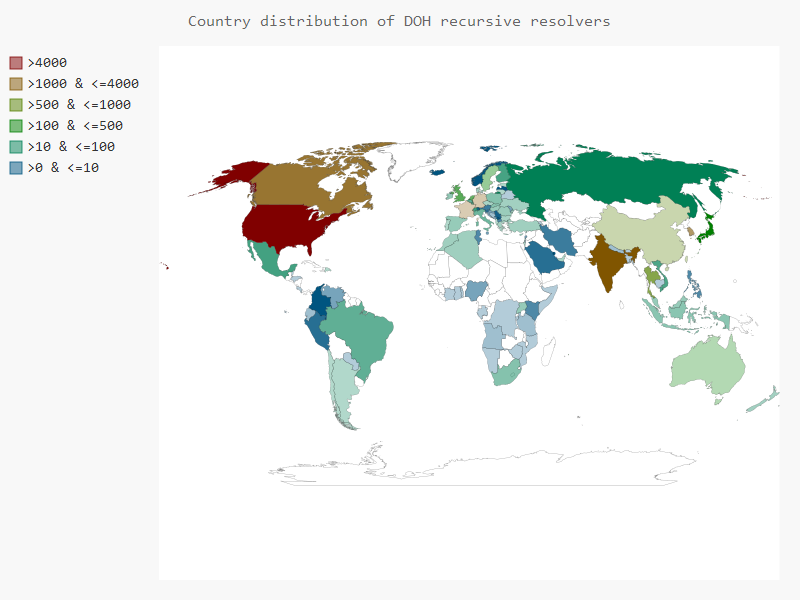

In [33]:
wm_style = RotateStyle('#800000', base_style=LightColorizedStyle)
world = World(style=wm_style)


world.title = 'Country distribution of DOH recursive resolvers'

world.add('>4000', doh_country_dict_4000)
world.add('>1000 & <=4000', doh_country_dict_1000)
world.add('>500 & <=1000', doh_country_dict_500)
world.add('>100 & <=500', doh_country_dict_100)
world.add('>10 & <=100', doh_country_dict_10)
world.add('>0 & <=10', doh_country_dict_1)


world.render_to_file('doh-country-1.svg')
world